In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric


print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Scikit-learn version:', sk.__version__)
print('Matplotlib version:', matplotlib.__version__)

%matplotlib inline

NumPy version: 1.12.1
Pandas version: 0.20.1
Scikit-learn version: 0.18.1
Matplotlib version: 2.0.2


In [3]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
dfiris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None,names=columns)

In [29]:
dfiris['Class'] = dfiris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dfiris)

     Sepal Length  Sepal Width  Petal Length  Petal Width          Species  \
0             5.1          3.5           1.4          0.2      Iris-setosa   
1             4.9          3.0           1.4          0.2      Iris-setosa   
2             4.7          3.2           1.3          0.2      Iris-setosa   
3             4.6          3.1           1.5          0.2      Iris-setosa   
4             5.0          3.6           1.4          0.2      Iris-setosa   
5             5.4          3.9           1.7          0.4      Iris-setosa   
6             4.6          3.4           1.4          0.3      Iris-setosa   
7             5.0          3.4           1.5          0.2      Iris-setosa   
8             4.4          2.9           1.4          0.2      Iris-setosa   
9             4.9          3.1           1.5          0.1      Iris-setosa   
10            5.4          3.7           1.5          0.2      Iris-setosa   
11            4.8          3.4           1.6          0.2      I

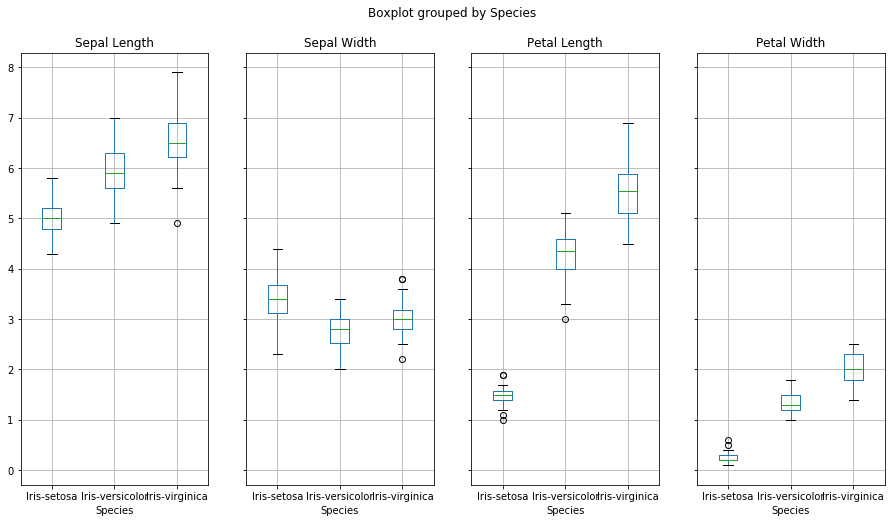

In [5]:
features = tuple(dfiris.columns[:4].values)
dfiris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));

In [168]:
x = dfiris[["Petal Length", "Petal Width"]]
y = dfiris["Class"]

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=60)

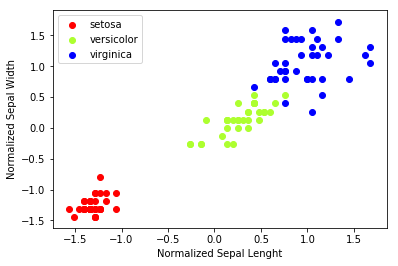

In [128]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = x_train[:, 0][y_train.as_matrix() == i]
    x2s = x_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Sepal Lenght')
plt.ylabel('Normalized Sepal Width');

In [171]:
for i in range(len(colors)):
    x1s = x_train[:, 2][y_train.as_matrix() == i]
    x2s = x_train[:, 3][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel('Normalized Petal Lenght')
plt.ylabel('Normalized Petal Width');

IndexError: index 2 is out of bounds for axis 1 with size 2

In [157]:
def knn(trainset, labelsresult, point, k):
    dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                        #We prepare an array to save the closests points in
    if (k < len(trainset)):                                             #You can't have more points than in the dataset.
        for i in range(0,k):
            closest.append([9999,0])
        for i in range(len(trainset)):
            distance = 0
            for c in range(len(trainset[0])):
                distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1] #Add the distance between each feature to the total
            for c in range(0,k):
                if (distance < closest[c][0]):
                    closest[c][0] = distance
                    closest[c][1] = i
                    c = k

    result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
    predlabels = []
    for i in range(0,k):
        point = closest[i][1]
        predlabels.append(result[point])
    return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
knn(x_train, y_train, [2,3,1,1], 5)

2

### Preperation
We start using Euclidean Distance Metrics and saving it in the `dist` variable.
Then we prepare the closest array. In there we will store the 2 values, the distance to the point being tested and the index in the array. Before we start the entire method, we want to check if there are more training points than the k. We can not look for more points then are in the set. We want to add the amount of points equal to k. This can simply be done in a loop starting with the code bellow.
```py
dist = DistanceMetric.get_metric('euclidean')
    closest = []                                                       
    if (k < len(trainset)):                                            
        for i in range(0,k):
            closest.append([9999,0])
```
### Calculating the distance
To start off, we loop through all the training points to collect the closest points. Within that we loop through the features and add the distance to the `distance` variable. We get a total distance of all features together.
```py
for i in range(len(trainset)):
           distance = 0
           for c in range(len(trainset[0])):
               distance = distance + dist.pairwise(dist.pairwise([[point[c]], [trainset[i][c]]]))[0][1]
```
### Comparing the distance to the closest points so far
We want to know which point is the clostest to our current point, still within the trainset loop, we go through all of our earlier created closest points and check if the distance is  shorter than the one stored. If that is the case, we override the distance with the new one and save the index with it and end the loop through the closest points. If we do not close this one, all the points would have been overwritten instead of only one. We do this for every point to create an array of the closest points. The code for this action:
```py
for c in range(0,k):
    if (distance < closest[c][0]):
        closest[c][0] = distance
        closest[c][1] = i
        c = k
```
### Fixing the y_train label array
Because of the nature of NumPy and SKLearn, the original indexes from the point array get send through. That means the array is a mess of random indexes and values assigned to it. I am unsure why this does not happen to the trainset's features. Because of this we need to reindex the array. NumPy does not have an easy solution for this so instead we iterate over all the values in the array and add them to a new array. The result is an array with indexes equal from 0 to the size of the array.
This has been done with the following code.
```py
result = []
    for x in np.nditer(labelsresult):
        result.append(int(x))
```
### Getting the labels
We have the closest points and their index and a sorted array with the labels. It's time to combine both of these and get the labels that the closest points have in an array. This is a very simple action of looking what the value is of the index in the label array and adding that to our new array.
```py
predlabels = []
for i in range(0,k):
    point = closest[i][1]
    predlabels.append(result[point])
```
### Predicting the label
One last line to sum everything up, we need to check the array for which label is in the most. This can be done using a dictonary. Because there was some insecurity on how to make this work properly, there is a oneliner that we coppied from StackOverflow. resulting in the following line.
```py
return max(set(predlabels), key=predlabels.count) #https://stackoverflow.com/a/1518632
```

In [170]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define Method
def knnfull(trainset, labelset, testset, testlabel, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model
    knn.fit(trainset, labelset)
    #Predit the result
    ypred = knn.predict(testset)
    #Return the accuracy score
    return accuracy_score(testlabel, ypred)
#Execute the Method and see the result
print("SKLearn's accuracy: " + str(knnfull(x_train, y_train, x_test, y_test, 5)*100) + "%")

SKLearn's accuracy: 92.1052631579%


In [183]:
right = 0
errors = 0
actual = []
print("Please fill in 0 for no debuging or 1 for debugging")
debug = bool(int(input()))
for x in np.nditer(y_test):
    #print(x)
    actual.append(int(x))
#Loop through all the test data
for i in range(len(y_test)):
    try:
        predicted = knn(x_train, y_train, x_test[i], 5)
        value = actual[i]
        #Execute the method made before and check it with the correct value
        if(debug):
            print("Guessed: " + str(predicted))
            print("Actual: "+ str(value))
            print('=======')
        if(predicted == value):
                right = right + 1
    except KeyError as details:
        print(details)
        #Random KeyError is throw.
        errors = errors +1
print("Amount of cases: " + str(len(x_test)))
print("Right perdiction: " + str(right))
print("Amount with errors: " + str(errors))
print("Accuracy with errors: " +str(right/len(x_test)*100)+"%")
print("Accuracy without errors: " + str(right/(len(x_test)-errors)*100) + "%")

Please fill in 0 for no debuging or 1 for debugging
1
Guessed: 1
Actual: 1
Guessed: 1
Actual: 1
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 2
Actual: 2
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 2
Actual: 2
Guessed: 1
Actual: 1
Guessed: 2
Actual: 2
Guessed: 1
Actual: 1
Guessed: 2
Actual: 2
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Guessed: 2
Actual: 2
Guessed: 2
Actual: 2
Guessed: 0
Actual: 0
Guessed: 1
Actual: 2
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 1
Actual: 1
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Guessed: 2
Actual: 2
Guessed: 1
Actual: 1
Guessed: 2
Actual: 2
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 0
Actual: 0
Guessed: 1
Actual: 1
Guessed: 0
Actual: 0
Amount of cases: 38
Right perdiction: 37
Amount with errors: 0
Accuracy with errors: 97.36842105263158%
Accuracy without errors: 97.36842105263158%
